In [2]:
import pandas as pd
df = pd.read_csv('tweets.csv')
df.drop(['id','date','query','user'],axis='columns',inplace=True)
df

,sentiment,text
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...
...,...,...
493,2,Ask Programming: LaTeX or InDesign?: submitted...
494,0,"On that note, I hate Word. I hate Pages. I hat..."
495,4,Ahhh... back in a *real* text editing environm...
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [24]:
df.groupby('sentiment').describe()

text                                                            \
          count unique                                                top   
sentiment                                                                   
0           177    177  @sportsguy33 Ummm, having some Time Warner pro...   
2           139    139  About to watch Night at the Museum with Ryan a...   
4           182    182                  My Kindle2 came and I LOVE it! :)   

               text_n         \
          freq  count unique   
sentiment                      
0            1    177    177   
2            1    139    139   
4            1    182    182   

                                                                   
                                                         top freq  
sentiment                                                          
0          at Time Warner for causin me to have slow inte...    1  
2                  CEO China will continue to be key partner    1  
4          when Lebron be do in the NBA he will probably ...    1

In [14]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import re
import numpy as np
import itertools

lem = WordNetLemmatizer()


def cleaning(text):
        txt = str(text)
        txt = re.sub(r"http\S+", "", txt)
        if len(txt) == 0:
            return 'no text'
        else:
            txt = txt.split()
            index = 0
            for j in range(len(txt)):
                if txt[j][0] == '@':
                    index = j
            txt = np.delete(txt, index)
            if len(txt) == 0:
                return 'no text'
            else:
                words = txt[0]
                for k in range(len(txt)-1):
                    words+= " " + txt[k+1]
                txt = words
                txt = re.sub(r'[^\w]', ' ', txt)
                if len(txt) == 0:
                    return 'no text'
                else:
                    txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
                    txt = txt.replace("'", "")
                    txt = nltk.tokenize.word_tokenize(txt)
                    #data.content[i] = [w for w in data.content[i] if not w in stopset]
                    for j in range(len(txt)):
                        txt[j] = lem.lemmatize(txt[j], "v")
                    if len(txt) == 0:
                        return 'no text'
                    else:
                        return ' '.join(txt)

In [15]:
df['text_n'] = df['text'].apply(lambda x: cleaning(x))
df

,sentiment,text,text_n
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...,I loovvee my Kindle2 Not that the DX be cool b...
1,4,Reading my kindle2... Love it... Lee childs i...,my kindle2 Love it Lee childs be good read
2,4,"Ok, first assesment of the #kindle2 ...it fuck...",first assesment of the kindle2 it fuck rock
3,4,@kenburbary You'll love your Kindle2. I've had...,You ll love your Kindle2 I ve have mine for a ...
4,4,@mikefish Fair enough. But i have the Kindle2...,Fair enough But i have the Kindle2 and I think...
...,...,...,...
493,2,Ask Programming: LaTeX or InDesign?: submitted...,Programming LaTeX or InDesign submit by calcio...
494,0,"On that note, I hate Word. I hate Pages. I hat...",that note I hate Word I hate Pages I hate LaTe...
495,4,Ahhh... back in a *real* text editing environm...,back in a real text edit environment I lt 3 LaTeX
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",in Iran I see Hmm Iran Iran so far away flocko...


In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.text_n,df.sentiment,train_size=4/5,random_state=89)

len(x_train)

398

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_test_count = v.transform(x_test)

In [133]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [134]:
model.score(x_test_count,y_test)

0.76

In [135]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [136]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 2, 2, 4, 0, 4, 4, 2, 4, 0,
       4, 4, 4, 4, 0, 0, 4, 2, 0, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0,
       4, 0, 0, 2, 4, 0, 0, 0, 4, 0, 4, 4, 2, 4, 4, 0, 2, 4, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 2, 2, 4, 4, 0, 4, 2, 2, 2, 4, 2, 0, 4, 0, 0, 4, 2,
       0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4], dtype=int64)

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  5],
       [ 4, 12,  8],
       [ 4,  3, 32]], dtype=int64)

Text(33.0, 0.5, 'Truth')

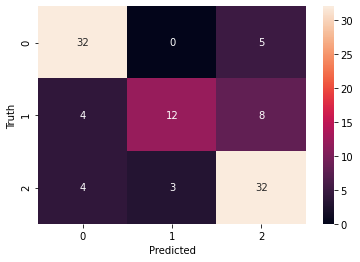

In [138]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
v = CountVectorizer()

for i in range(45,100):
    x_train,x_test,y_train,y_test = train_test_split(df.text_n,df.sentiment,train_size=4/5,random_state=i)
    x_train_count = v.fit_transform(x_train.values)
    model = MultinomialNB()
    model.fit(x_train_count,y_train)
    x_test_count = v.transform(x_test)
    res = model.score(x_test_count,y_test)
    print(i, res)

45 0.71
46 0.67
47 0.64
48 0.62
49 0.62
50 0.73
51 0.67
52 0.71
53 0.68
54 0.66
55 0.63
56 0.63
57 0.73
58 0.69
59 0.71
60 0.62
61 0.64
62 0.69
63 0.66
64 0.67
65 0.65
66 0.69
67 0.73
68 0.67
69 0.66
70 0.65
71 0.69
72 0.7
73 0.59
74 0.67
75 0.6
76 0.73
77 0.7
78 0.6
79 0.71
80 0.75
81 0.7
82 0.67
83 0.65
84 0.7
85 0.67
86 0.64
87 0.66
88 0.68
89 0.76
90 0.66
91 0.71
92 0.61
93 0.7
94 0.65
95 0.65
96 0.65
97 0.64
98 0.68
99 0.73


In [146]:
text = [
    'Ask Programming: LaTeX or InDesign?: submitted by calcio1 [link] [1 comment] http://tinyurl.com/myfmf7',
    'using Linux and loving it - so much nicer than windows... Looking forward to using the wysiwyg latex editor!',
    'After using LaTeX a lot, any other typeset mathematics just looks hideous.',
    'Trouble in Iran, I see. Hmm. Iran. Iran so far away. #flockofseagullsweregeopoliticallycorrect',
    'Reading the tweets coming out of Iran... The whole thing is terrifying and incredibly sad...',
    'Haters are gonna hate',
    'this is a car'
]

text_count = v.transform(text)
model.predict(text_count)

array([2, 4, 4, 0, 0, 0, 2], dtype=int64)

In [149]:
text = ['you look']
model.predict(v.transform(text))[0]

4

In [150]:
import pickle
with open('sentiment.pickle','wb') as f:
    pickle.dump(model,f)

In [152]:
with open('vectorisor.pickle','wb') as w:
    pickle.dump(v,w)